In [209]:
import numpy as np
from random import seed
import copy, random
import time
import subprocess
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import numpy as np
import pandas as pd
%matplotlib inline


types = ["insertionsort.cpp", "mergesort.cpp",
         "qsort.cpp", "nlognqsort.cpp",
         "heapsort.cpp", "stringsort.cpp",
         "stringbinsearchsort.cpp", "skiplistsort.cpp"]

def run_sort(command, input_data):
    res = subprocess.run(command, input=input_data, text=True, stdout=subprocess.PIPE, shell=True)
    return res.stdout

# Подгрузка информации

In [247]:
insertionsort_data = []
with open("Data_for_graphs/insertion.txt", "r") as f:
    for line in f.readlines():
        insertionsort_data += [float(line)]
f.close()

mergesort_data = []
with open("Data_for_graphs/merge.txt", "r") as f:
    for line in f.readlines():
        mergesort_data += [float(line)]
f.close()

heapsort_data = []
with open("Data_for_graphs/heap.txt", "r") as f:
    for line in f.readlines():
        heapsort_data += [float(line)]
f.close()

qsort_data = []
with open("Data_for_graphs/quicksort.txt", "r") as f:
    for line in f.readlines():
        qsort_data += [float(line)]
f.close()

stringsort_data = []
with open("Data_for_graphs/stringsort.txt", "r") as f:
    for line in f.readlines():
        stringsort_data += [float(line)]

stringbinsort_data = []
with open("Data_for_graphs/stringbinsort.txt", "r") as f:
    for line in f.readlines():
        stringbinsort_data += [float(line)]

skiplistsort_data = []
with open("Data_for_graphs/skiplist.txt", "r") as f:
    for line in f.readlines():
        skiplistsort_data += [float(line)]

nlognqsort_data = []
with open("Data_for_graphs/nlognqsort.txt", "r") as f:
    for line in f.readlines():
        nlognqsort_data += [float(line)]

stringsort_special_data = []
with open("Data_for_graphs/stringsort_special.txt", "r") as f:
    for line in f.readlines():
        stringsort_special_data += [float(line)]

stringbinsort_special_data = []
with open("Data_for_graphs/stringbinsort_special.txt", "r") as f:
    for line in f.readlines():
        stringbinsort_special_data += [float(line)]

In [246]:
sort_type = 6
compile_command = f"g++ {types[sort_type]} -o test"
subprocess.run(compile_command, shell=True)
exec_command  = "./test"
with open("Data_for_graphs/stringbinsort_special.txt", "w") as f:
    for m in [1, 5, 10, 20, 45, 75, 100, 150, 200]:
        for n in [10, 30, 80, 150, 400, 1500, 4000, 7000, 10000]:
            test = 0
            for i in range(5):
                input_data = str(n) + '\n' + str(m)
                exec_time = run_sort(exec_command, input_data)
                test += float(exec_time)
            f.write(str(test / 5) + '\n')


# Insertion Sort Graph

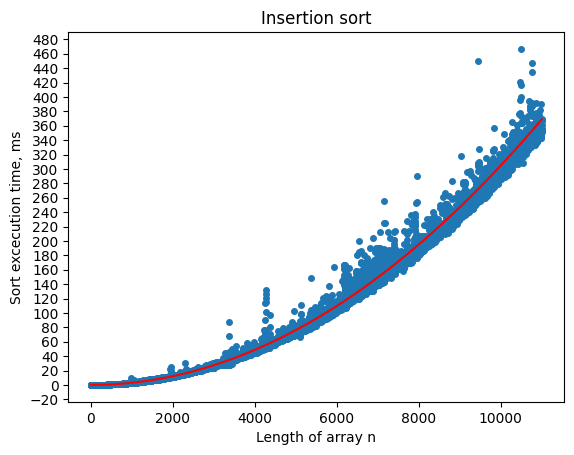

In [211]:
x = [n for n in range(1, 11000)]
y = [1000 * el for el in insertionsort_data]
x1 = np.arange(0, 11000, 0.1)
y1 = 3.05 * x1**2 / 1000000
plt.plot(x, y, marker='o', markersize=4, linestyle=' ')
plt.plot(x1, y1, color='red')
desired_y_ticks = 40
plt.locator_params(axis='y', nbins=desired_y_ticks)
plt.plot()
plt.title('Insertion sort')
plt.xlabel('Length of array n')
plt.ylabel('Sort excecution time, ms')
plt.show()

# NlogN Quick Sort

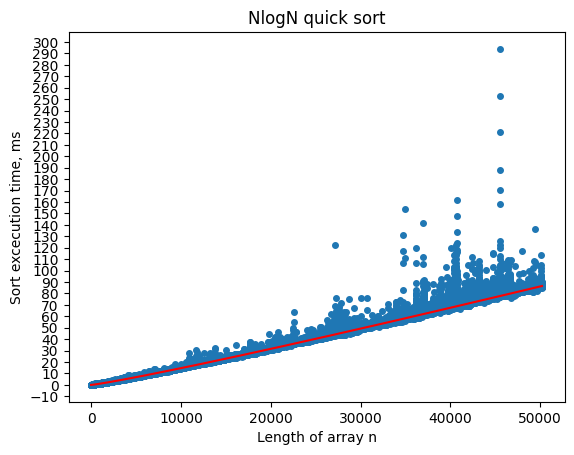

In [225]:
x = [n for n in range(1, 50200)]
y = [1000 * el for el in nlognqsort_data]
x1 = np.arange(1, 50200, 0.1)
y1 = 1.1 * x1 * np.log2(x1) / (1000 * np.log2(1000))
plt.plot(x, y, marker='o', markersize=4, linestyle=' ')
plt.plot(x1, y1, color='red')
desired_y_ticks = 40
plt.locator_params(axis='y', nbins=desired_y_ticks)
plt.plot()
plt.title('NlogN quick sort')
plt.xlabel('Length of array n')
plt.ylabel('Sort excecution time, ms')
plt.show()

# Merge Sort Graph

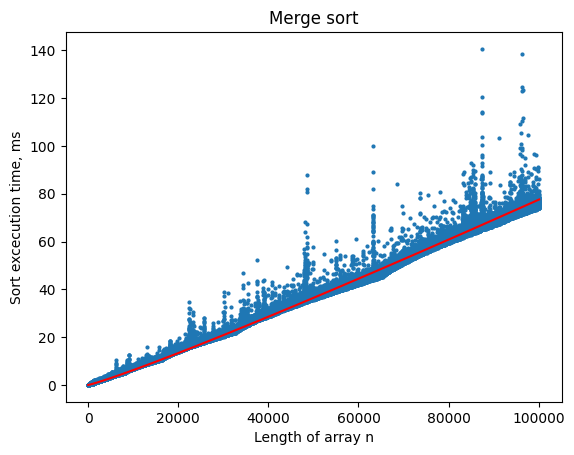

In [213]:
x = [n for n in range(1, 100100)]
y = [1000 * el for el in mergesort_data]
x1 = np.arange(1, 100100, 0.1)
y1 = x1 * np.log2(x1) / (2.15 * 1000 * np.log2(1000))
plt.plot(x, y, marker='o', markersize=2, linestyle=' ')
plt.plot(x1, y1, color='red')
desired_y_ticks = 10
plt.locator_params(axis='y', nbins=desired_y_ticks)
plt.plot()
plt.title('Merge sort')
plt.xlabel('Length of array n')
plt.ylabel('Sort excecution time, ms')
plt.show()

# Quick Sort Graph

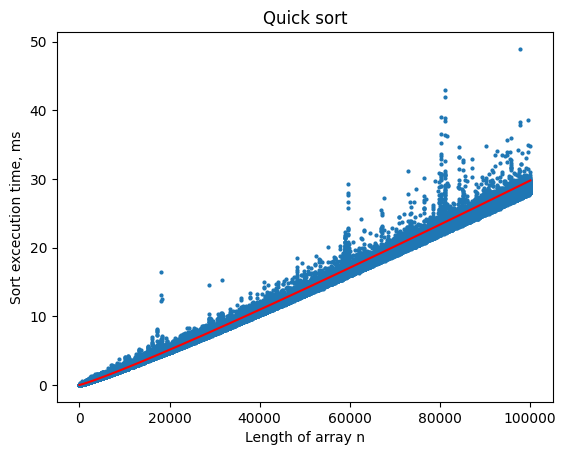

In [214]:
x = [n for n in range(1, 100100)]
y = [1000 * el for el in qsort_data]
x1 = np.arange(1, 100100, 0.1)
y1 = x1 * np.log2(x1) / (5.6 * 1000 * np.log2(1000))
plt.plot(x, y, marker='o', markersize=2, linestyle=' ')
plt.plot(x1, y1, color='red')
desired_y_ticks = 10
plt.locator_params(axis='y', nbins=desired_y_ticks)
plt.plot()
plt.title('Quick sort')
plt.xlabel('Length of array n')
plt.ylabel('Sort excecution time, ms')
plt.show()

# Heap Sort Graph

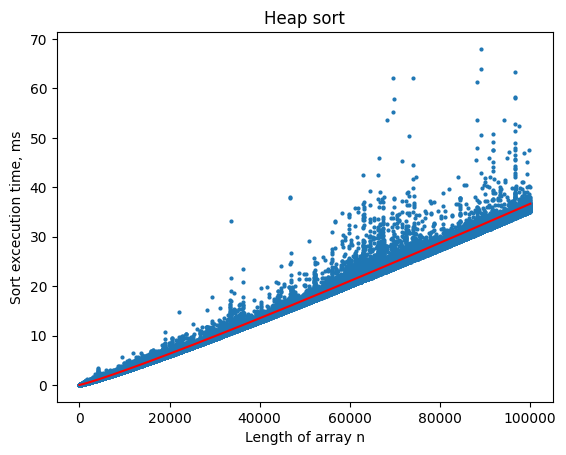

In [49]:
x = [n for n in range(1, 100100)]
y = [1000 * el for el in heapsort_data]
x1 = np.arange(1, 100100, 0.1)
y1 = x1 * np.log2(x1) / (4.55 * 1000 * np.log2(1000))
plt.plot(x, y, marker='o', markersize=2, linestyle=' ')
plt.plot(x1, y1, color='red')
desired_y_ticks = 10
plt.locator_params(axis='y', nbins=desired_y_ticks)
plt.plot()
plt.title('Heap sort')
plt.xlabel('Length of array n')
plt.ylabel('Sort excecution time, ms')
plt.show()

# Skip List Sort Graph

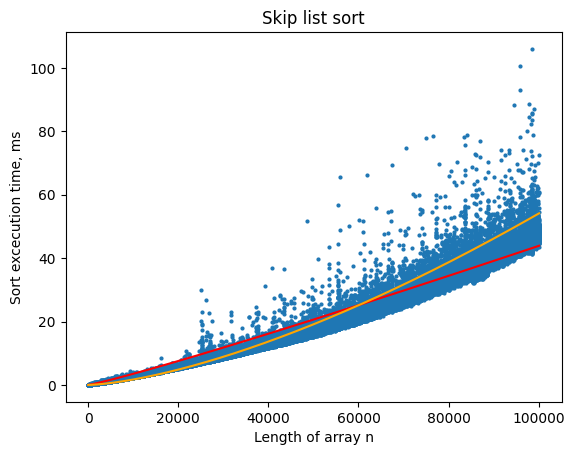

In [215]:
x = [n for n in range(1, 100100)]
y = [1000 * el for el in skiplistsort_data]
x1 = np.arange(1, 100100, 0.1)
y1 = x1 * np.log2(x1) / (3.8 * 1000 * np.log2(1000))
y2 = x1 * np.sqrt(x1) / (1000 * np.sqrt(1000) * 18.5)
plt.plot(x, y, marker='o', markersize=2, linestyle=' ')
plt.plot(x1, y1, color='red')
plt.plot(x1, y2, color='orange')
desired_y_ticks = 10
plt.locator_params(axis='y', nbins=desired_y_ticks)
plt.plot()
plt.title('Skip list sort')
plt.xlabel('Length of array n')
plt.ylabel('Sort excecution time, ms')
plt.show()

# NlogN Guaranteed Quick Sort
Сортировка, честно говоря, не крутая. Константа, которая возникает под капотом у O(NlogN) огромная. Поэтому для n = 10^5 уже сортировке плохо (T = 0.6 sec).

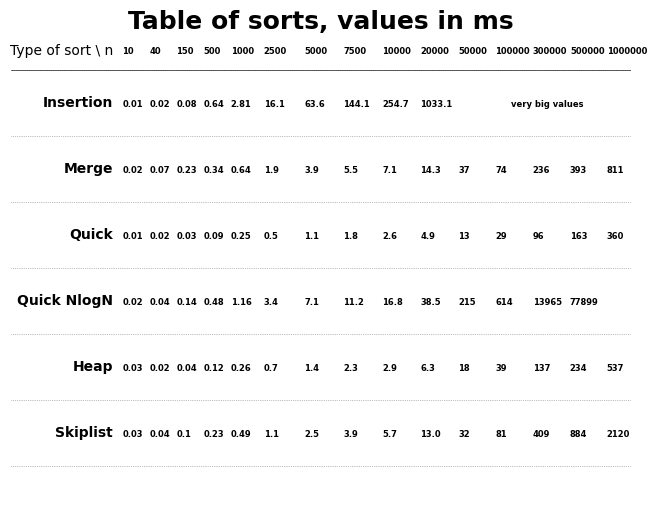

In [216]:
ntests = [10, 40, 150, 500, 1000, 2500, 5000, 7500, 10000, 20000, 50000, 100000, 300000, 500000, 1000000]
types_of_sorts = ["Insertion", "Merge", "Quick", "Quick NlogN", "Heap", "Skiplist"]
insertion_tests = [1.383E-05, 1.832E-05, 8.062E-05, 0.00064453, 0.00281347, 0.01610034, 0.06363654, 0.144059, 0.254709, 1.0331]
merge_tests = [2.49E-05, 0.0000715214, 0.0002340316, 0.0003368128, 0.0006374556, 0.0019489626, 0.0038576212, 0.0055058952,
               0.0070928256, 0.0143219446, 0.03725022, 0.074277916, 0.2362212912, 0.3938808, 0.8118994]
qsort_tests = [1.46E-05, 1.79E-05, 3.26E-05, 9.36E-05, 0.000245613, 0.0004876376, 0.001107584, 0.001837016,
               0.002602716, 0.004931068, 0.01380158, 0.02933614, 0.09639222, 0.163707, 0.360239]
qsort_nlogn_tests = [2.377E-05, 4.156e-05, 0.00014316, 0.00047767, 0.00116303, 0.00341158, 0.00710555, 
               0.01116396, 0.01683226, 0.03854926, 0.2152154, 0.6144878, 13.96546, 77.89946, "Very big"]
heap_tests = [3.4733E-05, 2.07418E-05, 4.34616E-05, 0.000116561, 0.0002614382, 0.0007121566, 0.00135945,
              0.002287592, 0.002861662, 0.006280428, 0.01872828, 0.0391922, 0.1370568, 0.2346942, 0.5371392]
skiplist_tests = [3.394E-05, 4.33E-05, 0.00010098, 0.00023449, 0.00048765, 0.00112804, 0.00246293, 0.00390321,
              0.00566682, 0.01304138, 0.03227925, 0.08183625, 0.40933815, 0.88446923, 2.12028154]


fig, ax = plt.subplots(figsize=(8,6))
rows = 5
cols = 80
ax.set_ylim(-1, rows + 1)
ax.set_xlim(-17, cols + 6)
ax.set_title('Table of sorts, values in ms', loc='center', fontsize=18, weight='bold')
ax.text(x=0, y=5.8, s='Type of sort \ n', va='center', ha='right')

for i in range(15):
  if i < 5: ax.text(1.5 + 4.5 * i, 5.75, ntests[i], weight='bold', ha='left', size=6, fontdict=None)
  else : ax.text(6 * i - 30 / (i + 1), 5.75, ntests[i], weight='bold', ha='left', size=6, fontdict=None)
for i in range(10):
  if i < 5: ax.text(1.5 + 4.5 * i, 4.95, round(insertion_tests[i] * 1000, 2), weight='bold', ha='left', size=6, fontdict=None)
  else : ax.text(6 * i - 30 / (i + 1), 4.95, round(insertion_tests[i] * 1000, 1), weight='bold', ha='left', size=6, fontdict=None)
ax.text(6 * 9 - 30 / 10 + 15, 4.95, "very big values", weight='bold', ha='left', size=6, fontdict=None)
for i in range(15):
  if i < 5: ax.text(1.5 + 4.5 * i, 3.95, round(merge_tests[i] * 1000, 2), weight='bold', ha='left', size=6, fontdict=None)
  elif i < 10 : ax.text(6 * i - 30 / (i + 1), 3.95, round(merge_tests[i] * 1000, 1), weight='bold', ha='left', size=6, fontdict=None)
  else : ax.text(6 * i - 30 / (i + 1), 3.95, int(merge_tests[i] * 1000), weight='bold', ha='left', size=6, fontdict=None)
for i in range(15):
  if i < 5: ax.text(1.5 + 4.5 * i, 2.95, round(qsort_tests[i] * 1000, 2), weight='bold', ha='left', size=6, fontdict=None)
  elif i < 10 : ax.text(6 * i - 30 / (i + 1), 2.95, round(qsort_tests[i] * 1000, 1), weight='bold', ha='left', size=6, fontdict=None)
  else : ax.text(6 * i - 30 / (i + 1), 2.95, int(qsort_tests[i] * 1000), weight='bold', ha='left', size=6, fontdict=None)
for i in range(14):
  if i < 5: ax.text(1.5 + 4.5 * i, 1.95, round(qsort_nlogn_tests[i] * 1000, 2), weight='bold', ha='left', size=6, fontdict=None)
  elif i < 10 : ax.text(6 * i - 30 / (i + 1), 1.95, round(qsort_nlogn_tests[i] * 1000, 1), weight='bold', ha='left', size=6, fontdict=None)
  else : ax.text(6 * i - 30 / (i + 1), 1.95, int(qsort_nlogn_tests[i] * 1000), weight='bold', ha='left', size=6, fontdict=None)
for i in range(15):
  if i < 5: ax.text(1.5 + 4.5 * i, 0.95, round(heap_tests[i] * 1000, 2), weight='bold', ha='left', size=6, fontdict=None)
  elif i < 10 : ax.text(6 * i - 30 / (i + 1), 0.95, round(heap_tests[i] * 1000, 1), weight='bold', ha='left', size=6, fontdict=None)
  else : ax.text(6 * i - 30 / (i + 1), 0.95, int(heap_tests[i] * 1000), weight='bold', ha='left', size=6, fontdict=None)
for i in range(15):
  if i < 5: ax.text(1.5 + 4.5 * i, -0.05, round(skiplist_tests[i] * 1000, 2), weight='bold', ha='left', size=6, fontdict=None)
  elif i < 10 : ax.text(6 * i - 30 / (i + 1), -0.05, round(skiplist_tests[i] * 1000, 1), weight='bold', ha='left', size=6, fontdict=None)
  else : ax.text(6 * i - 30 / (i + 1), -0.05, int(skiplist_tests[i] * 1000), weight='bold', ha='left', size=6, fontdict=None)
ax.axis('off')
ax.plot([-17, 90], [5.5, 5.5], lw='.5', c='black')
for row in range(6):
    ax.text(x=0, y=row, s=types_of_sorts[5 - row], va='center', ha='right', weight='bold')
for row in range(80):
    ax.plot([-17, cols + 10], [row -.5, row - .5], ls=':', lw='.5', c='grey')

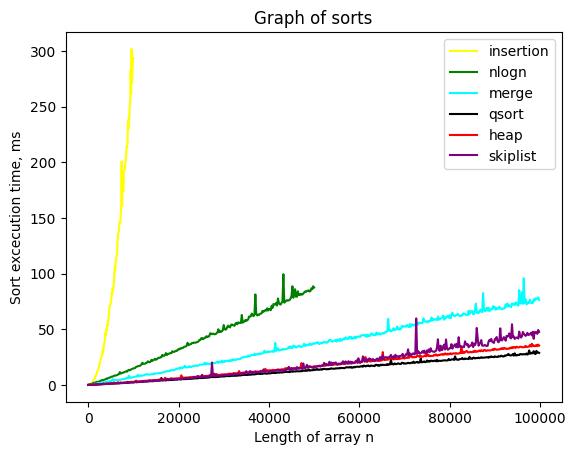

In [239]:
x1 = [n for n in range(1, 10100, 100)]
x2 = [n for n in range(1, 50200, 200)]
x3 = [n for n in range(1, 100000, 200)]
plt.plot(x1, [1000 * insertionsort_data[x] for x in x1], color='yellow')
plt.plot(x2, [1000 * nlognqsort_data[x] for x in x2], color='green')
plt.plot(x3, [1000 * mergesort_data[x] for x in x3], color='cyan')
plt.plot(x3, [1000 * qsort_data[x] for x in x3], color='black')
plt.plot(x3, [1000 * heapsort_data[x] for x in x3], color='red')
plt.plot(x3, [1000 * skiplistsort_data[x] for x in x3], color='purple')
plt.title('Graph of sorts')
plt.xlabel('Length of array n')
plt.ylabel('Sort excecution time, ms')
plt.legend(('insertion', 'nlogn', 'merge', 'qsort', 'heap', 'skiplist'))

## Так как рассматривать все возможные варианты значений m и n - это очень долго, просто возьмём n in [10, 30, 80, 150, 400, 1500, 4000, 7000, 10000]; m in [1, 5, 10, 20, 45, 75, 100, 150, 200]

In [217]:
def table(data, name, r):
    num_of_tests = [10, 30, 80, 150, 400, 1500, 4000, 7000, 10000]
    length_of_str = [1, 5, 10, 20, 45, 75, 100, 150, 200]
    m1 = [data[x] for x in range(0, 9)]
    m2 = [data[x] for x in range(9, 18)]
    m3 = [data[x] for x in range(18, 27)]
    m4 = [data[x] for x in range(27, 36)]
    m5 = [data[x] for x in range(36, 45)]
    m6 = [data[x] for x in range(45, 54)]
    m7 = [data[x] for x in range(54, 63)]
    m8 = [data[x] for x in range(63, 72)]
    m9 = [data[x] for x in range(72, 81)]

    fig, ax = plt.subplots(figsize=(8,6))
    rows = 9
    cols = 18
    ax.set_ylim(-1, rows + 1)
    ax.set_xlim(-1, cols + .5)
    ax.set_title(name, loc='center', fontsize=18, weight='bold')
    ax.text(x=0, y=8.85, s='n \ m', va='center', ha='right')
    for row in range(9):
        if row < 3 : ax.text(x=.5, y=row, s=round(m1[8 - row], r), va='center', ha='left')
        else : ax.text(x=.5, y=row, s=round(m1[8 - row], 3), va='center', ha='left')
        if row < 3 : ax.text(x=2.5, y=row, s=round(m2[8 - row], r), va='center', ha='left')
        else : ax.text(x=2.5, y=row, s=round(m2[8 - row], 3), va='center', ha='left')
        if row < 3 : ax.text(x=4.5, y=row, s=round(m3[8 - row], r), va='center', ha='left')
        else : ax.text(x=4.5, y=row, s=round(m3[8 - row], 3), va='center', ha='left')
        if row < 3 : ax.text(x=6.5, y=row, s=round(m4[8 - row], r), va='center', ha='left')
        else : ax.text(x=6.5, y=row, s=round(m4[8 - row], 3), va='center', ha='left')
        if row < 3 : ax.text(x=8.5, y=row, s=round(m5[8 - row], r), va='center', ha='left')
        else : ax.text(x=8.5, y=row, s=round(m5[8 - row], 3), va='center', ha='left')
        if row < 3 : ax.text(x=10.5, y=row, s=round(m6[8 - row], r), va='center', ha='left')
        else : ax.text(x=10.5, y=row, s=round(m6[8 - row], 3), va='center', ha='left')
        if row < 3 : ax.text(x=12.5, y=row, s=round(m7[8 - row], r), va='center', ha='left')
        else : ax.text(x=12.5, y=row, s=round(m7[8 - row], 3), va='center', ha='left')
        if row < 3 : ax.text(x=14.5, y=row, s=round(m8[8 - row], r), va='center', ha='left')
        else : ax.text(x=14.5, y=row, s=round(m8[8 - row], 3), va='center', ha='left')
        if row < 3 : ax.text(x=16.5, y=row, s=round(m9[8 - row], r), va='center', ha='left')
        else : ax.text(x=16.5, y=row, s=round(m9[8 - row], 3), va='center', ha='left')
    for row in range(9):
        ax.text(x=0, y=row, s=num_of_tests[8 - row], va='center', ha='right', weight='bold')
    ax.text(.5, 8.75, 1, weight='bold', ha='left')
    ax.text(2.5, 8.75, 5, weight='bold', ha='left')
    ax.text(4.5, 8.75, 10, weight='bold', ha='left')
    ax.text(6.5, 8.75, 20, weight='bold', ha='left')
    ax.text(8.5, 8.75, 45, weight='bold', ha='left')
    ax.text(10.5, 8.75, 75, weight='bold', ha='left')
    ax.text(12.5, 8.75, 100, weight='bold', ha='left')
    ax.text(14.5, 8.75, 150, weight='bold', ha='left')
    ax.text(17.35, 8.75, 200, weight='bold', ha='right')
    ax.axis('off')
    ax.plot([-1, cols + 1], [9.5, 9.5], lw='.5', c='black')
    for row in range(18):
        ax.plot([0, cols + 1], [row -.5, row - .5], ls=':', lw='.5', c='grey')

# Insertion Sort on strings

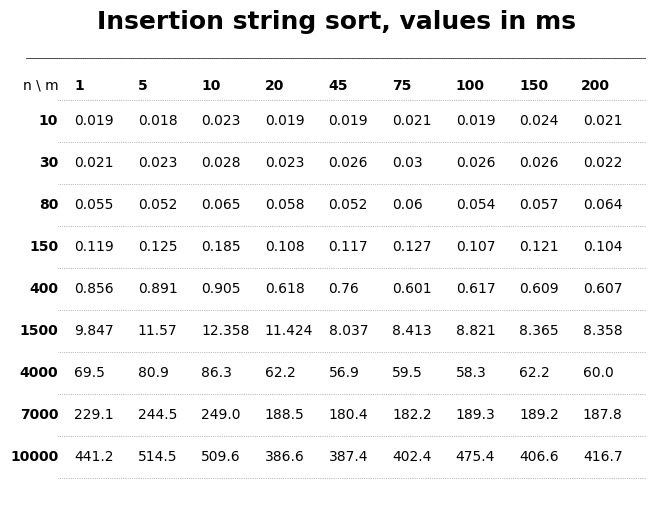

In [218]:
table([1000 * x for x in stringsort_data], 'Insertion string sort, values in ms', 1)

# Insertion String Sort With Binary Search

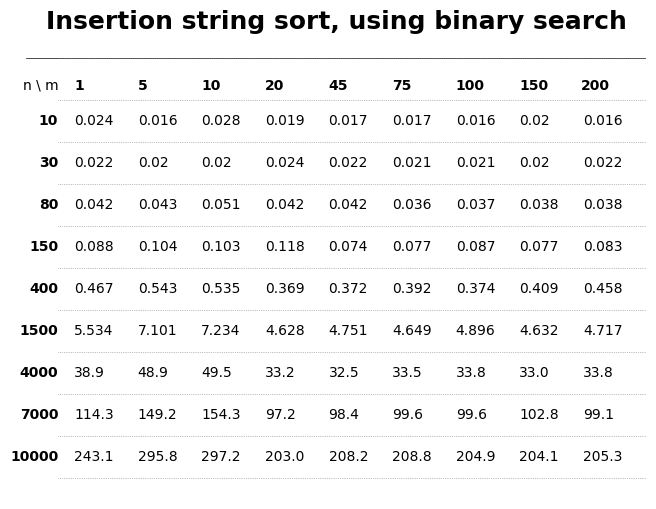

In [219]:
table([1000 * x for x in stringbinsort_data],'Insertion string sort, using binary search', 1)

# How Faster With Binary Search

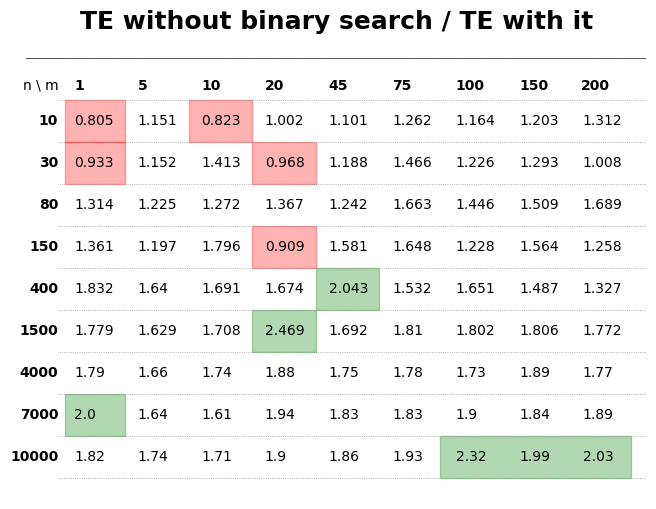

In [220]:
num_of_tests = [10, 30, 80, 150, 400, 1500, 4000, 7000, 10000]
length_of_str = [1, 5, 10, 20, 45, 75, 100, 150, 200]
m1 = [stringsort_data[x] / stringbinsort_data[x] for x in range(0, 9)]
m2 = [stringsort_data[x] / stringbinsort_data[x] for x in range(9, 18)]
m3 = [stringsort_data[x] / stringbinsort_data[x] for x in range(18, 27)]
m4 = [stringsort_data[x] / stringbinsort_data[x] for x in range(27, 36)]
m5 = [stringsort_data[x] / stringbinsort_data[x] for x in range(36, 45)]
m6 = [stringsort_data[x] / stringbinsort_data[x] for x in range(45, 54)]
m7 = [stringsort_data[x] / stringbinsort_data[x] for x in range(54, 63)]
m8 = [stringsort_data[x] / stringbinsort_data[x] for x in range(63, 72)]
m9 = [stringsort_data[x] / stringbinsort_data[x] for x in range(72, 81)]

fig, ax = plt.subplots(figsize=(8,6))
rows = 9
cols = 18
ax.set_ylim(-1, rows + 1)
ax.set_xlim(-1, cols + .5)
ax.set_title('TE without binary search / TE with it', loc='center', fontsize=18, weight='bold')
ax.text(x=0, y=8.85, s='n \ m', va='center', ha='right')
for row in range(9):
    if row < 3 : ax.text(x=.5, y=row, s=round(m1[8 - row], 2), va='center', ha='left')
    else : ax.text(x=.5, y=row, s=round(m1[8 - row], 3), va='center', ha='left')
    if row < 3 : ax.text(x=2.5, y=row, s=round(m2[8 - row], 2), va='center', ha='left')
    else : ax.text(x=2.5, y=row, s=round(m2[8 - row], 3), va='center', ha='left')
    if row < 3 : ax.text(x=4.5, y=row, s=round(m3[8 - row], 2), va='center', ha='left')
    else : ax.text(x=4.5, y=row, s=round(m3[8 - row], 3), va='center', ha='left')
    if row < 3 : ax.text(x=6.5, y=row, s=round(m4[8 - row], 2), va='center', ha='left')
    else : ax.text(x=6.5, y=row, s=round(m4[8 - row], 3), va='center', ha='left')
    if row < 3 : ax.text(x=8.5, y=row, s=round(m5[8 - row], 2), va='center', ha='left')
    else : ax.text(x=8.5, y=row, s=round(m5[8 - row], 3), va='center', ha='left')
    if row < 3 : ax.text(x=10.5, y=row, s=round(m6[8 - row], 2), va='center', ha='left')
    else : ax.text(x=10.5, y=row, s=round(m6[8 - row], 3), va='center', ha='left')
    if row < 3 : ax.text(x=12.5, y=row, s=round(m7[8 - row], 2), va='center', ha='left')
    else : ax.text(x=12.5, y=row, s=round(m7[8 - row], 3), va='center', ha='left')
    if row < 3 : ax.text(x=14.5, y=row, s=round(m8[8 - row], 2), va='center', ha='left')
    else : ax.text(x=14.5, y=row, s=round(m8[8 - row], 3), va='center', ha='left')
    if row < 3 : ax.text(x=16.5, y=row, s=round(m9[8 - row], 2), va='center', ha='left')
    else : ax.text(x=16.5, y=row, s=round(m9[8 - row], 3), va='center', ha='left')
for row in range(9):
    ax.text(x=0, y=row, s=num_of_tests[8 - row], va='center', ha='right', weight='bold')
ax.text(.5, 8.75, 1, weight='bold', ha='left')
ax.text(2.5, 8.75, 5, weight='bold', ha='left')
ax.text(4.5, 8.75, 10, weight='bold', ha='left')
ax.text(6.5, 8.75, 20, weight='bold', ha='left')
ax.text(8.5, 8.75, 45, weight='bold', ha='left')
ax.text(10.5, 8.75, 75, weight='bold', ha='left')
ax.text(12.5, 8.75, 100, weight='bold', ha='left')
ax.text(14.5, 8.75, 150, weight='bold', ha='left')
ax.text(17.35, 8.75, 200, weight='bold', ha='right')
ax.axis('off')
ax.plot([-1, cols + 1], [9.5, 9.5], lw='.5', c='black')
for row in range(18):
    ax.plot([0, cols + 1], [row -.5, row - .5], ls=':', lw='.5', c='grey')

ax.fill_between([12, 18], -0.5, 0.5, color='green', alpha=0.3)
ax.fill_between([0.2, 2.1], 0.5, 1.5, color='green', alpha=0.3)
ax.fill_between([6.1, 8.1], 2.5, 3.5, color='green', alpha=0.3)
ax.fill_between([8.1, 10.1], 3.5, 4.5, color='green', alpha=0.3)
ax.fill_between([0.2, 2.1], 6.5, 7.5, color='red', alpha=0.3)
ax.fill_between([0.2, 2.1], 7.5, 8.5, color='red', alpha=0.3)
ax.fill_between([4.1, 6.1], 7.5, 8.5, color='red', alpha=0.3)
ax.fill_between([6.1, 8.1], 6.5, 7.5, color='red', alpha=0.3)
ax.fill_between([6.1, 8.1], 4.5, 5.5, color='red', alpha=0.3)

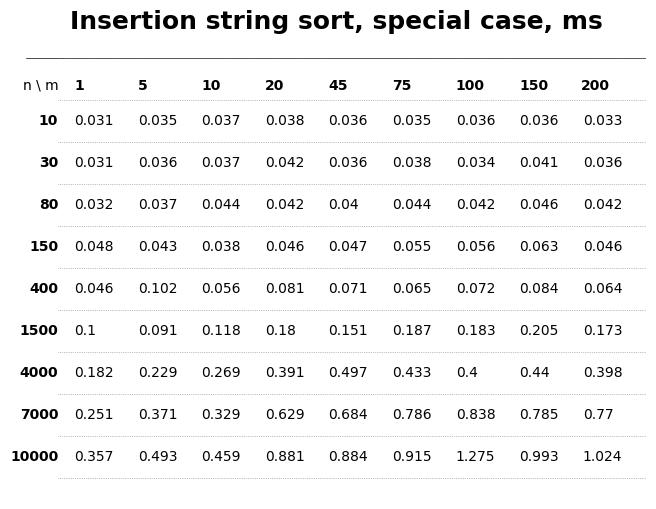

In [245]:
table([1000 * x for x in stringsort_special_data], 'Insertion string sort, special case, ms', 3)

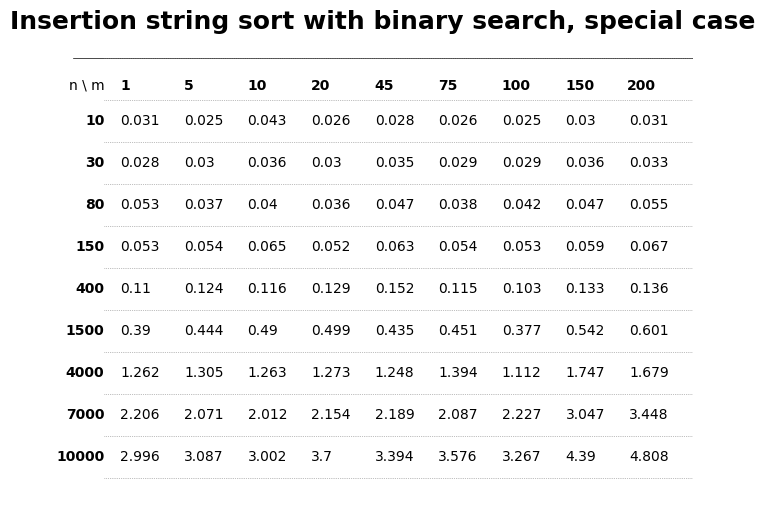

In [248]:
table([1000 * x for x in stringbinsort_special_data], 'Insertion string sort with binary search, special case', 3)

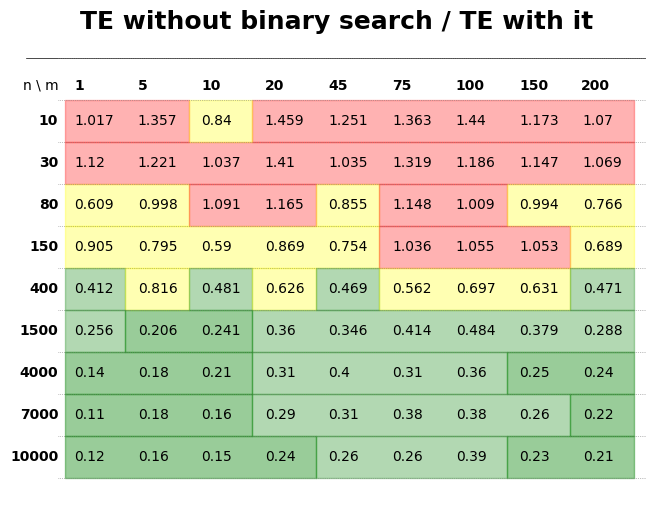

In [275]:
num_of_tests = [10, 30, 80, 150, 400, 1500, 4000, 7000, 10000]
length_of_str = [1, 5, 10, 20, 45, 75, 100, 150, 200]
m1 = [stringsort_special_data[x] / stringbinsort_special_data[x] for x in range(0, 9)]
m2 = [stringsort_special_data[x] / stringbinsort_special_data[x] for x in range(9, 18)]
m3 = [stringsort_special_data[x] / stringbinsort_special_data[x] for x in range(18, 27)]
m4 = [stringsort_special_data[x] / stringbinsort_special_data[x] for x in range(27, 36)]
m5 = [stringsort_special_data[x] / stringbinsort_special_data[x] for x in range(36, 45)]
m6 = [stringsort_special_data[x] / stringbinsort_special_data[x] for x in range(45, 54)]
m7 = [stringsort_special_data[x] / stringbinsort_special_data[x] for x in range(54, 63)]
m8 = [stringsort_special_data[x] / stringbinsort_special_data[x] for x in range(63, 72)]
m9 = [stringsort_special_data[x] / stringbinsort_special_data[x] for x in range(72, 81)]

fig, ax = plt.subplots(figsize=(8,6))
rows = 9
cols = 18
ax.set_ylim(-1, rows + 1)
ax.set_xlim(-1, cols + .5)
ax.set_title('TE without binary search / TE with it', loc='center', fontsize=18, weight='bold')
ax.text(x=0, y=8.85, s='n \ m', va='center', ha='right')
for row in range(9):
    if row < 3 : ax.text(x=.5, y=row, s=round(m1[8 - row], 2), va='center', ha='left')
    else : ax.text(x=.5, y=row, s=round(m1[8 - row], 3), va='center', ha='left')
    if row < 3 : ax.text(x=2.5, y=row, s=round(m2[8 - row], 2), va='center', ha='left')
    else : ax.text(x=2.5, y=row, s=round(m2[8 - row], 3), va='center', ha='left')
    if row < 3 : ax.text(x=4.5, y=row, s=round(m3[8 - row], 2), va='center', ha='left')
    else : ax.text(x=4.5, y=row, s=round(m3[8 - row], 3), va='center', ha='left')
    if row < 3 : ax.text(x=6.5, y=row, s=round(m4[8 - row], 2), va='center', ha='left')
    else : ax.text(x=6.5, y=row, s=round(m4[8 - row], 3), va='center', ha='left')
    if row < 3 : ax.text(x=8.5, y=row, s=round(m5[8 - row], 2), va='center', ha='left')
    else : ax.text(x=8.5, y=row, s=round(m5[8 - row], 3), va='center', ha='left')
    if row < 3 : ax.text(x=10.5, y=row, s=round(m6[8 - row], 2), va='center', ha='left')
    else : ax.text(x=10.5, y=row, s=round(m6[8 - row], 3), va='center', ha='left')
    if row < 3 : ax.text(x=12.5, y=row, s=round(m7[8 - row], 2), va='center', ha='left')
    else : ax.text(x=12.5, y=row, s=round(m7[8 - row], 3), va='center', ha='left')
    if row < 3 : ax.text(x=14.5, y=row, s=round(m8[8 - row], 2), va='center', ha='left')
    else : ax.text(x=14.5, y=row, s=round(m8[8 - row], 3), va='center', ha='left')
    if row < 3 : ax.text(x=16.5, y=row, s=round(m9[8 - row], 2), va='center', ha='left')
    else : ax.text(x=16.5, y=row, s=round(m9[8 - row], 3), va='center', ha='left')
for row in range(9):
    ax.text(x=0, y=row, s=num_of_tests[8 - row], va='center', ha='right', weight='bold')
ax.text(.5, 8.75, 1, weight='bold', ha='left')
ax.text(2.5, 8.75, 5, weight='bold', ha='left')
ax.text(4.5, 8.75, 10, weight='bold', ha='left')
ax.text(6.5, 8.75, 20, weight='bold', ha='left')
ax.text(8.5, 8.75, 45, weight='bold', ha='left')
ax.text(10.5, 8.75, 75, weight='bold', ha='left')
ax.text(12.5, 8.75, 100, weight='bold', ha='left')
ax.text(14.5, 8.75, 150, weight='bold', ha='left')
ax.text(17.35, 8.75, 200, weight='bold', ha='right')
ax.axis('off')
ax.plot([-1, cols + 1], [9.5, 9.5], lw='.5', c='black')
for row in range(18):
    ax.plot([0, cols + 1], [row -.5, row - .5], ls=':', lw='.5', c='grey')
ax.fill_between([0.2, 18.1], 6.5, 7.5, color='red', alpha=0.3)
ax.fill_between([0.2, 4.1], 7.5, 8.5, color='red', alpha=0.3)
ax.fill_between([6.1, 18.1], 7.5, 8.5, color='red', alpha=0.3)
ax.fill_between([4.1, 6.1], 7.5, 8.5, color='yellow', alpha=0.3)
ax.fill_between([0.2, 4.1], 5.5, 6.5, color='yellow', alpha=0.3)
ax.fill_between([4.1, 8.1], 5.5, 6.5, color='red', alpha=0.3)
ax.fill_between([8.1, 10.1], 5.5, 6.5, color='yellow', alpha=0.3)
ax.fill_between([10.1, 14.1], 5.5, 6.5, color='red', alpha=0.3)
ax.fill_between([14.1, 18.1], 5.5, 6.5, color='yellow', alpha=0.3)
ax.fill_between([0.2, 10.1], 4.5, 5.5, color='yellow', alpha=0.3)
ax.fill_between([10.1, 16.1], 4.5, 5.5, color='red', alpha=0.3)
ax.fill_between([16.1, 18.1], 4.5, 5.5, color='yellow', alpha=0.3)
ax.fill_between([0.2, 2.1], 3.5, 4.5, color='green', alpha=0.3)
ax.fill_between([2.1, 4.1], 3.5, 4.5, color='yellow', alpha=0.3)
ax.fill_between([4.1, 6.1], 3.5, 4.5, color='green', alpha=0.3)
ax.fill_between([6.1, 8.1], 3.5, 4.5, color='yellow', alpha=0.3)
ax.fill_between([8.1, 10.1], 3.5, 4.5, color='green', alpha=0.3)
ax.fill_between([10.1, 16.1], 3.5, 4.5, color='yellow', alpha=0.3)
ax.fill_between([16.1, 18.1], 3.5, 4.5, color='green', alpha=0.3)
ax.fill_between([0.2, 2.1], 2.5, 3.5, color='green', alpha=0.3)
ax.fill_between([2.1, 6.1], 2.5, 3.5, color='green', alpha=0.4)
ax.fill_between([6.1, 18.1], 2.5, 3.5, color='green', alpha=0.3)
ax.fill_between([0.2, 6.1], 1.5, 2.5, color='green', alpha=0.4)
ax.fill_between([6.1, 14.1], 1.5, 2.5, color='green', alpha=0.3)
ax.fill_between([14.1, 18.1], 1.5, 2.5, color='green', alpha=0.4)
ax.fill_between([0.2, 6.1], 0.5, 1.5, color='green', alpha=0.4)
ax.fill_between([6.1, 16.1], 0.5, 1.5, color='green', alpha=0.3)
ax.fill_between([16.1, 18.1], 0.5, 1.5, color='green', alpha=0.4)
ax.fill_between([0.2, 8.1], -0.5, 0.5, color='green', alpha=0.4)
ax.fill_between([8.1, 14.1], -0.5, 0.5, color='green', alpha=0.3)
ax.fill_between([14.1, 18.1], -0.5, 0.5, color='green', alpha=0.4)